Los modelos lineales son fundamentales tanto en estadística como en el aprendizaje automático, pues muchos métodos se apoyan en la combinación lineal de variables que describen los datos. Lo más sencillo será ajustar una línea recta con `LinearRegression`, pero veremos que contamos con un abaníco mucho más grande de herramientas.

Para mostrar cómo funcionan estos modelos vamos a emplear uno de los dataset que ya incorpora `scikit-learn`.

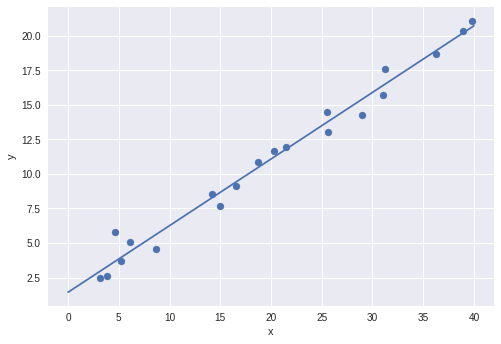

In [1]:
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()


def plot_linear_regression():
    a = 0.5
    b = 1.0

    x = 40 * np.random.random(20)

    y = a * x + b + np.random.normal(size=x.shape)

    clasificador_lineal = LinearRegression()
    clasificador_lineal.fit(x[:, None], y)

    x_new = np.linspace(0, 40, 100)
    y_new = clasificador_lineal.predict(x_new[:, None])

    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')
    
plot_linear_regression()
plt.show()

### Regresión Lineal

Se utiliza para estimar los valores reales (costo de las viviendas, el número de llamadas, ventas totales, etc.) basados en variables continuas. La idea es tratar de establecer la relación entre las variables independientes y dependientes por medio de ajustar una mejor línea recta con respecto a los puntos. Esta línea de mejor ajuste se conoce como línea de regresión.

Veamos un pequeño ejemplo de como se implementa en Python. En este ejemplo voy a utilizar el dataset Boston que ya viene junto con Scikit-learn y es ideal para practicar con Regresiones Lineales; el mismo contiene precios de casas de varias áreas de la ciudad de Boston.

In [2]:
# importando los datasets de sklearn
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
print(boston.data.shape)
print(boston.data)

(506, 13)
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


In [4]:
print(boston.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [5]:
# estructura de nuestro dataset que leemos con pandas
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


El Boston dataset es un conjunto de datos para el análisis de los precios de las viviendas en la región de Boston. Con `boston.DESCR` podemos obtener una descripción del dataset, con información sobre el mismo, como el tipo de atributos.

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Vemos que tenemos 506 muestras con 13 atributos que nos ayudarán a predecir el precio medio de la vivienda. Ahora bien, no todos los atributos serán significativos ni todos tendrán el mismo peso a la hora de determinar el precio de la vivienda.

## LinearRegression

Ya tenemos los datos, vamos a ajustar una línea recta para ver cuál es la tendencia que siguen los precios en función del atributo.

Lo primero es importar `LinearRegression` y crear un objeto.

In [7]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(normalize=True)

Una vez tenemos claro el modelo a emplear, el siguiente paso es entrenarlo con los datos de variables independientes y variables dependientes que tenemos. Para ello, en scikit-learn tenemos funciones del tipo:
    
    modelo.fit(X, y)

In [8]:
##Utilizar el paquete sklearn.model_selection
from sklearn.model_selection import train_test_split

print('Modelo',modelo)

# Entrenar el modelo usando los conjuntos de entrenamiento
modelo.fit(boston.data, boston.target)
 
# Puntuación de la varianza: 1 es la predicción perfecta 
puntuacion = modelo.score(boston.data, boston.target)
print('Puntuacion 1:',puntuacion)


# Dividir los datos en conjuntos de entrenamiento / prueba 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

# Entrenar el modelo usando los conjuntos de entrenamiento
# Para entrenar el modelo hay que llamar al método fit del objeto LinearRegression
modelo.fit(X_train, y_train)

puntuacion = modelo.score(X_test, y_test)
print('Puntuacion 2:',puntuacion)

Modelo LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Puntuacion 1: 0.740607742865
Puntuacion 2: 0.688210529154


Una vez completado el proceso podemos ver los coeficientes que ha asignado a cada atributo y así ver de qué manera contribuyen al precio final de la vivienda.

In [9]:
# Lista de coeficientes B para cada X
list(zip(boston.feature_names, modelo.coef_))

[('CRIM', -0.11474902499782845),
 ('ZN', 0.049338932230914005),
 ('INDUS', -0.032600036456235722),
 ('CHAS', 3.1412976000595445),
 ('NOX', -15.453764519788763),
 ('RM', 4.186654891914074),
 ('AGE', -0.013812372105962143),
 ('DIS', -1.5598049011850939),
 ('RAD', 0.31906870452514935),
 ('TAX', -0.013453722055273483),
 ('PTRATIO', -0.84212448562354369),
 ('B', 0.0087841306650595832),
 ('LSTAT', -0.45440451882704797)]

Con esto ya tendríamos una pequeña idea de cuales son los factores que más contribuyen a incrementar o disminuir el precio de la vivienda.

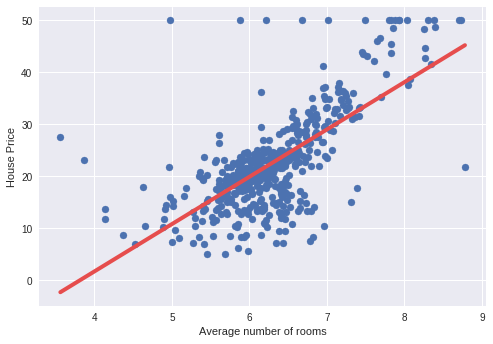

In [10]:
x = boston.data[:, 5]
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)

fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms")
ax.set_ylabel("House Price")
ax.scatter(boston.data[:, 5], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-',color=(.9,.3,.3), lw=4)
plt.show()

Podemos ver que  emplear sólo un parámetro para determinar el precio de la vivienda mediante una línea recta no parece lo ideal. Pero si tomamos en cuenta todas las variables las predicciones posiblemente mejoren.

### Para evaluar nuestro modelo podemos utilizar otros enfoques: en lugar de separar el conjunto de entrenamiento, vamos a utilizar cross-validation

### La validación cruzada suele implicar los siguientes pasos:
1. Partición del conjunto de datos en k subconjuntos diferentes.
2. Crear k diferentes modelos de formación en k-1 subconjuntos y pruebas en el resto.
3. Mida el rendimiento de cada uno de los k modelos y utilice el valor medio como valor de rendimiento.

In [11]:
from sklearn import cross_validation

def train_and_evaluate(clf, X_train, y_train, folds):
    clf.fit(X_train, y_train)
    print ('Score on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    #create a k-fold cross validation iterator of k=5 folds
    cv = cross_validation.KFold(X_train.shape[0], folds, shuffle=True, random_state=33)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=cv)
    print ('Average score using {}-fold crossvalidation:{:.2f}'.format(folds,np.mean(scores)))

/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Una de las principales ventajas de la validación cruzada es la reducción de la varianza de las medidas de evaluación. Tenga en cuenta que cuando tiene un conjunto de entrenamiento y pruebas, el resultado dependerá de cómo los haya creado. La evaluación dentro del aprendizaje automático generalmente asume que la distribución de clases en sus conjuntos de entrenamiento y pruebas son similares. Si este no es el caso, puede obtener resultados que no son una medida precisa del rendimiento del clasificador real. La validación cruzada nos permite mitigar este riesgo: ya que estamos haciendo un promedio de k modelos diferentes construidos sobre k conjuntos de datos diferentes, estamos reduciendo la varianza y probablemente la producción de resultados más realistas para nuestros modelos.

In [12]:
clf_sgd = LinearRegression()
train_and_evaluate(clf_sgd, X_train, y_train,5)

Score on training set: 0.76
Average score using 5-fold crossvalidation:0.71
